In [1]:
# Importando algunas librerías

# Librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

# Librerías de scikit-learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.feature_extraction import _stop_words, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

# Librerías para graficar los árboles
import graphviz
import pydotplus
import matplotlib.image as mpimg
from IPython.display import Image, Markdown

In [2]:
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_rows=100

In [3]:
dtype_dict = {
    'AppID': 'int64',
    'name': 'object',
    'release_date': 'object',
    'required_age': 'object',
    'price': 'float64',
    'dlc_count': 'float64',
    'detailed_description': 'object',
    'about_the_game': 'object',
    'short_description': 'object',
    'reviews': 'object',
    'header_image': 'object',
    'website': 'object',
    'support_url': 'object',
    'support_email': 'object',
    'windows': 'object',
    'mac': 'object',
    'linux': 'object',
    'metacritic_score': 'object',
    'metacritic_url': 'object',
    'achievements': 'object',
    'recommendations': 'object',
    'notes': 'object',
    'supported_languages': 'object',
    'full_audio_languages': 'object',
    'packages': 'object',
    
    'Unnamed: 87': 'float64',
    'Unnamed: 88': 'float64',
    'Unnamed: 89': 'float64'
}


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Leemos el dataset 
</div>

In [4]:
df = pd.read_csv('games_may2024_cleaned (1).csv',  dtype=dtype_dict, low_memory=False)
print(df.columns)


Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Elegimos las columnas que queremos extraer su informacion
</div>

In [5]:
print(df.columns)

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')


In [6]:
df = df[[ "about_the_game", "short_description","genres", "tags"]]
print(df.head(10))

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Realizamos estas 2 celdas ya que no queremos los NAN en cada fila de cada columna
</div>

In [7]:
df_cleaned = df.dropna()

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Podemos ver el df sin los NAN en cada fila de cada columna 
</div>

In [8]:
dtype_dict = {
    'AppID': 'int64',
    'name': 'object',
    'release_date': 'object',
    'required_age': 'object',
    'price': 'float64',
    'dlc_count': 'float64',
    'detailed_description': 'object',
    'about_the_game': 'object',
    'short_description': 'object',
    'reviews': 'object',
    'header_image': 'object',
    'website': 'object',
    'support_url': 'object',
    'support_email': 'object',
    'windows': 'object',
    'mac': 'object',
    'linux': 'object',
    'metacritic_score': 'object',
    'metacritic_url': 'object',
    'achievements': 'object',
    'recommendations': 'object',
    'notes': 'object',
    'supported_languages': 'object',
    'full_audio_languages': 'object',
    'packages': 'object',
    
    'Unnamed: 87': 'float64',
    'Unnamed: 88': 'float64',
    'Unnamed: 89': 'float64'
}


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Leemos el dataset 
</div>

In [9]:
df = pd.read_csv('games_may2024_cleaned (1).csv',  dtype=dtype_dict, low_memory=False)
print(df.columns)


Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Elegimos las columnas que queremos extraer su informacion
</div>

In [10]:
print(df.columns)

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')


In [11]:
df = df[[ "about_the_game", "short_description","genres", "tags"]]
print(df.head(10))

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Realizamos estas 2 celdas ya que no queremos los NAN en cada fila de cada columna
</div>

In [12]:
df_cleaned = df.dropna()

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Podemos ver el df sin los NAN en cada fila de cada columna 
</div>

In [13]:
df_cleaned

,about_the_game,short_description,genres,tags
0,"For over two decades, Counter-Strike has offered an elite competitive experience, one shaped by millions of players from across the globe. And now the next chapter in the CS story is about to begin. This is Counter-Strike 2. A free upgrade to CS:GO, Counter-Strike 2 marks the largest technical leap in Counter-Strike’s history. Built on the Source 2 engine, Counter-Strike 2 is modernized with realistic physically-based rendering, state of the art networking, and upgraded Community Workshop tools. In addition to the classic objective-focused gameplay that Counter-Strike pioneered in 1999, Counter-Strike 2 features: All-new CS Ratings with the updated Premier mode Global and Regional leaderboards Upgraded and overhauled maps Game-changing dynamic smoke grenades Tick-rate-independent gameplay Redesigned visual effects and audio All items from CS:GO moving forward to CS2","For over two decades, Counter-Strike has offered an elite competitive experience, one shaped by millions of players from across the globe. And now the next chapter in the CS story is about to begin. This is Counter-Strike 2.","['Action', 'Free to Play']","{'FPS': 90076, 'Shooter': 64786, 'Multiplayer': 61798, 'Competitive': 52887, 'Action': 47165, 'Team-Based': 46061, 'e-sports': 43144, 'Tactical': 41033, 'First-Person': 39082, 'PvP': 34156, 'Online Co-Op': 33708, 'Co-op': 30037, 'Strategy': 29902, 'Military': 28512, 'War': 27826, 'Difficult': 25814, 'Trading': 25487, 'Realistic': 25261, 'Fast-Paced': 25188, 'Moddable': 6453}"
1,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS for free. Land on strategic locations, loot weapons and supplies, and survive to become the last team standing across various, diverse Battlegrounds. Squad up and join the Battlegrounds for the original Battle Royale experience that only PUBG: BATTLEGROUNDS can offer. This content download will also provide access to the BATTLEGROUNDS Test Server, which requires a separate download to play. Optional in-game purchases available.","Play PUBG: BATTLEGROUNDS for free. Land on strategic locations, loot weapons and supplies, and survive to become the last team standing across various, diverse Battlegrounds. Squad up and join the Battlegrounds for the original Battle Royale experience that only PUBG: BATTLEGROUNDS can offer.","['Action', 'Adventure', 'Massively Multiplayer', 'Free to Play']","{'Survival': 14611, 'Shooter': 12477, 'Battle Royale': 10683, 'Multiplayer': 10648, 'FPS': 8242, 'PvP': 7598, 'Third-Person Shooter': 7202, 'Action': 5921, 'Online Co-Op': 5261, 'Tactical': 4969, 'Co-op': 4240, 'First-Person': 4000, 'Strategy': 3046, 'Early Access': 2799, 'Competitive': 2351, 'Third Person': 2302, 'Team-Based': 2016, 'Difficult': 1691, 'Simulation': 1338, 'Stealth': 1251}"
2,"The most-played game on Steam. Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own. One Battlefield. Infinite Possibilities. When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style. All heroes are free. Competitive balance is Dota's crown jewel, and to ensure everyone is playing on an even field, the core content of the game—like the vast pool of heroes—is available to all players. Fans can collect cosmetics for heroes and fun add-ons for the world they inhabit, but everything you need to play is already included before you join your first match. Bring your friends and party up. Dota is deep, and constantly evolving, but it's never too late to joi

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Realizamos la limpieza profunda
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Instalamos la libreria de emoji para poder eliminar cada emoji que aparezca en el dataset
</div>

In [14]:
#%pip install emoji

In [15]:
import re

def clean_df(df):
    if df is None:
        return None
    df_copy = df.copy()
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002600-\U000026FF"  # Miscellaneous Symbols
                               u"\U00002700-\U000027BF"  # Dingbats
                               "]+", flags=re.UNICODE)
    
    # Define the replacement patterns
    replace_patterns = [
        ('•', False),
        ('◆', False),
        ('™', False),
        ('®', False),
        ('©', False),
        ('█', False),
        ('▒', False),
        ('__', False),
        ('……', False),
        ('†', False),
        ('※', False),
        ('', False),
        ('£', False),
        ('⊰⊱', False),
        ('๑̀́و', False),
        ("'", False),
        ('...', False),
        ('-', False),
        ('—', False),
        ('_', False),
        ('___________', False),
        (r'[,.:;=()*+&^%$#@!{}~\[\]<>?/|\\\-\'"«»–“”]', True)
    ]
    
    for columna in df_copy.columns:
        # Apply emoji pattern removal
        df_copy[columna] = df_copy[columna].astype(str).apply(lambda x: emoji_pattern.sub(r'', x))
        
        # Apply all replacement patterns
        for pattern, is_regex in replace_patterns:
            df_copy[columna] = df_copy[columna].str.replace(pattern, '', regex=is_regex)
        
        # Convert text to lowercase
        df_copy[columna] = df_copy[columna].str.lower()
    
    return df_copy


In [16]:
df_cleaned = clean_df(df_cleaned)

In [17]:
# Esto nos ayuda a saber si el signo o caracter esta todavia en la columna del dataset
contiene_caracter = df_cleaned['about_the_game'].astype(str).str.contains('•')

# Verifica si algún elemento contiene el carácter "®"
if contiene_caracter.any():
    print("La columna contiene al menos un '®'.")
else:
    print("La columna no contiene el carácter '®'.")

La columna no contiene el carácter '®'.


In [18]:
df_cleaned['genres']

0                                        action free to play
1        action adventure massively multiplayer free to play
2                               action strategy free to play
3                                           action adventure
4                                                     action
                                ...                         
83641                                  casual indie strategy
83642                                         indie strategy
83643                                                  indie
83644                                 action adventure indie
83645                violent action adventure indie strategy
Name: genres, Length: 83455, dtype: object

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Instalamos la libreria de emoji para poder eliminar cada emoji que aparezca en el dataset
</div>

In [19]:
df_cleaned.to_csv('df_cleaned_games_limpia.csv', index=False)

In [31]:
df_cleaned[]

0                                        action free to play
1        action adventure massively multiplayer free to play
2                               action strategy free to play
3                                           action adventure
4                                                     action
                                ...                         
83641                                  casual indie strategy
83642                                         indie strategy
83643                                                  indie
83644                                 action adventure indie
83645                violent action adventure indie strategy
Name: genres, Length: 83354, dtype: object

In [55]:
df_cleaned = df_cleaned.dropna(subset=['about_the_game', 'genres'])


In [56]:
print(len(df_cleaned['about_the_game']))
print(len(df_cleaned['genres']))


83354
83354


In [63]:
df_cleaned['filtered_genres'] = df_cleaned['genres'].apply(lambda x: len(x))


In [65]:
df_cleaned['genres']

0                                        action free to play
1        action adventure massively multiplayer free to play
2                               action strategy free to play
3                                           action adventure
4                                                     action
                                ...                         
83641                                  casual indie strategy
83642                                         indie strategy
83643                                                  indie
83644                                 action adventure indie
83645                violent action adventure indie strategy
Name: genres, Length: 83354, dtype: object

In [66]:
df_cleaned['genres'] = df_cleaned['genres'].apply(lambda x: x.split())


In [67]:
# Crear una lista de todos los géneros
all_genres = [genre for sublist in df_cleaned['genres'] for genre in sublist]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

In [68]:
# Filtrar géneros que tienen menos de 2 ejemplos
filtered_genres = [genre for genre, count in genre_counts.items() if count >= 2]


In [69]:
# Función para filtrar géneros en cada fila
def filter_genres(genres):
    return [genre for genre in genres if genre in filtered_genres]
# Aplicar la función de filtro
df_cleaned['filtered_genres'] = df_cleaned['genres'].apply(filter_genres)


In [70]:
print(df_cleaned['filtered_genres'].head())


0                                       [action, free, to, play]
1    [action, adventure, massively, multiplayer, free, to, play]
2                             [action, strategy, free, to, play]
3                                            [action, adventure]
4                                                       [action]
Name: filtered_genres, dtype: object


In [71]:
# Eliminar filas donde 'filtered_genres' esté vacío
df_cleaned = df_cleaned[df_cleaned['filtered_genres'].map(len) > 0]


In [72]:
# Verificar las longitudes
assert len(df_cleaned['about_the_game']) == len(df_cleaned['filtered_genres']), "Las longitudes de las columnas no coinciden."


In [73]:
# Crear una lista de todos los géneros
all_genres = [genre for sublist in df_cleaned['filtered_genres'] for genre in sublist]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

# Filtrar géneros que tienen menos de 2 ejemplos
filtered_genres = [genre for genre, count in genre_counts.items() if count >= 2]

# Función para filtrar géneros en cada fila
def filter_genres(genres):
    return [genre for genre in genres if genre in filtered_genres]

# Aplicar la función de filtro
df_cleaned['filtered_genres'] = df_cleaned['genres'].apply(filter_genres)

# Eliminar filas donde 'filtered_genres' esté vacío
df_cleaned = df_cleaned[df_cleaned['filtered_genres'].map(len) > 0]

# Verificar las longitudes
assert len(df_cleaned['about_the_game']) == len(df_cleaned['filtered_genres']), "Las longitudes de las columnas no coinciden."



In [74]:
# Suponiendo que df_cleaned es tu DataFrame
genre_counts = df_cleaned['filtered_genres'].value_counts()
print("Contador de géneros:")
print(genre_counts)

# Obtener las clases con al menos 2 ejemplos
valid_genres = genre_counts[genre_counts >= 2].index
print("Géneros válidos:")
print(valid_genres)

# Filtrar el DataFrame para mantener solo los géneros válidos
df_filtered = df_cleaned[df_cleaned['genres'].isin(valid_genres)]

# Verificar las longitudes después de la limpieza
print("Longitud original del DataFrame:", len(df_cleaned))
print("Longitud después del filtrado:", len(df_filtered))

Contador de géneros:
filtered_genres
[casual, indie]                                                       4687
[action, indie]                                                       4578
[action, adventure, indie]                                            3897
[adventure, indie]                                                    3240
[adventure, casual, indie]                                            2699
                                                                      ... 
[action, adventure, casual, free, to, play, strategy]                    1
[casual, indie, rpg, simulation, sports, strategy, free, to, play]       1
[action, adventure, indie, rpg, simulation, sports, early, access]       1
[sexual, content, nudity, action, adventure, indie, rpg]                 1
[adventure, casual, racing, free, to, play]                              1
Name: count, Length: 2599, dtype: int64
Géneros válidos:
Index([                                                                          

In [76]:
# Contar las clases de géneros en el DataFrame filtrado
genre_counts_filtered = df_filtered['filtered_genres'].apply(pd.Series).stack().value_counts()

# Identificar géneros con al menos 2 ejemplos
valid_filtered_genres = genre_counts_filtered[genre_counts_filtered >= 2].index
print("Géneros válidos después del segundo filtrado:")
print(valid_filtered_genres)

# Filtrar el DataFrame para mantener solo los géneros válidos
df_final = df_filtered[df_filtered['filtered_genres'].apply(lambda x: all(genre in valid_filtered_genres for genre in x))]

# Verificar las longitudes después del filtrado
print("Longitud después del segundo filtrado:", len(df_final))


Géneros válidos después del segundo filtrado:
Index(['indie', 'casual', 'action', 'adventure', 'simulation', 'strategy',
       'rpg', 'early', 'access', 'free', 'play', 'to', 'sports', 'racing',
       'multiplayer', 'massively', 'utilities', 'illustration', 'design',
       'production', 'violent', 'animation', 'modeling', 'education', 'video',
       'gore', 'audio', 'development', 'game', 'software', 'training', 'photo',
       'editing', 'web', 'publishing', 'nudity', 'content', 'sexual',
       'accounting'],
      dtype='object')
Longitud después del segundo filtrado: 82173


In [77]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_final['about_the_game'], 
    df_final['genres'], 
    test_size=0.3, 
    stratify=df_final['filtered_genres'],  # Usar stratify si todas las clases tienen suficientes ejemplos
    random_state=42
)

print(f"Número de ejemplos en el conjunto de entrenamiento: {len(X_train)}")
print(f"Número de ejemplos en el conjunto de prueba: {len(X_test)}")


Número de ejemplos en el conjunto de entrenamiento: 57521
Número de ejemplos en el conjunto de prueba: 24652


In [79]:
mlb = MultiLabelBinarizer()
y_train_encoded = mlb.fit_transform(y_train)
y_test_encoded = mlb.transform(y_test)

In [80]:
# Crear el binarizador de múltiples etiquetas
mlb = MultiLabelBinarizer()

# Ajustar y transformar los datos de entrenamiento
y_train_encoded = mlb.fit_transform(y_train)

# Transformar los datos de prueba usando el binarizador ajustado
y_test_encoded = mlb.transform(y_test)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
# Crear el pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=1000)))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train_encoded)

# Predecir y evaluar
y_pred = pipeline.predict(X_test)

# Convertir predicciones binarizadas de nuevo a formato original
y_pred_labels = mlb.inverse_transform(y_pred)
y_test_labels = mlb.inverse_transform(y_test_encoded)

from sklearn.metrics import accuracy_score, classification_report

# Para evaluar, necesitarás adaptar el cálculo de la precisión y el reporte
# Aquí hay un ejemplo simple para precisión promedio
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred, target_names=mlb.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.200876196657472
Classification Report:
              precision    recall  f1-score   support

      access       0.69      0.11      0.19      2476
  accounting       0.00      0.00      0.00         4
      action       0.79      0.71      0.75     10272
   adventure       0.72      0.65      0.68      9765
   animation       0.62      0.09      0.16        85
       audio       1.00      0.09      0.17        43
      casual       0.72      0.60      0.66     10516
     content       0.00      0.00      0.00        13
      design       0.87      0.12      0.20       112
 development       0.00      0.00      0.00        38
       early       0.69      0.11      0.19      2476
     editing       0.00      0.00      0.00        24
   education       0.00      0.00      0.00        80
        free       0.61      0.04      0.08      1961
        game       0.00      0.00      0.00        38
        gore       0.00      0.00      0.00        59
illustration       0.87      0

c:\Users\zaloke\Documents\python\Lenguaje_natural\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zaloke\Documents\python\Lenguaje_natural\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\zaloke\Documents\python\Lenguaje_natural\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zaloke\Documents\python\Lenguaje_natural\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


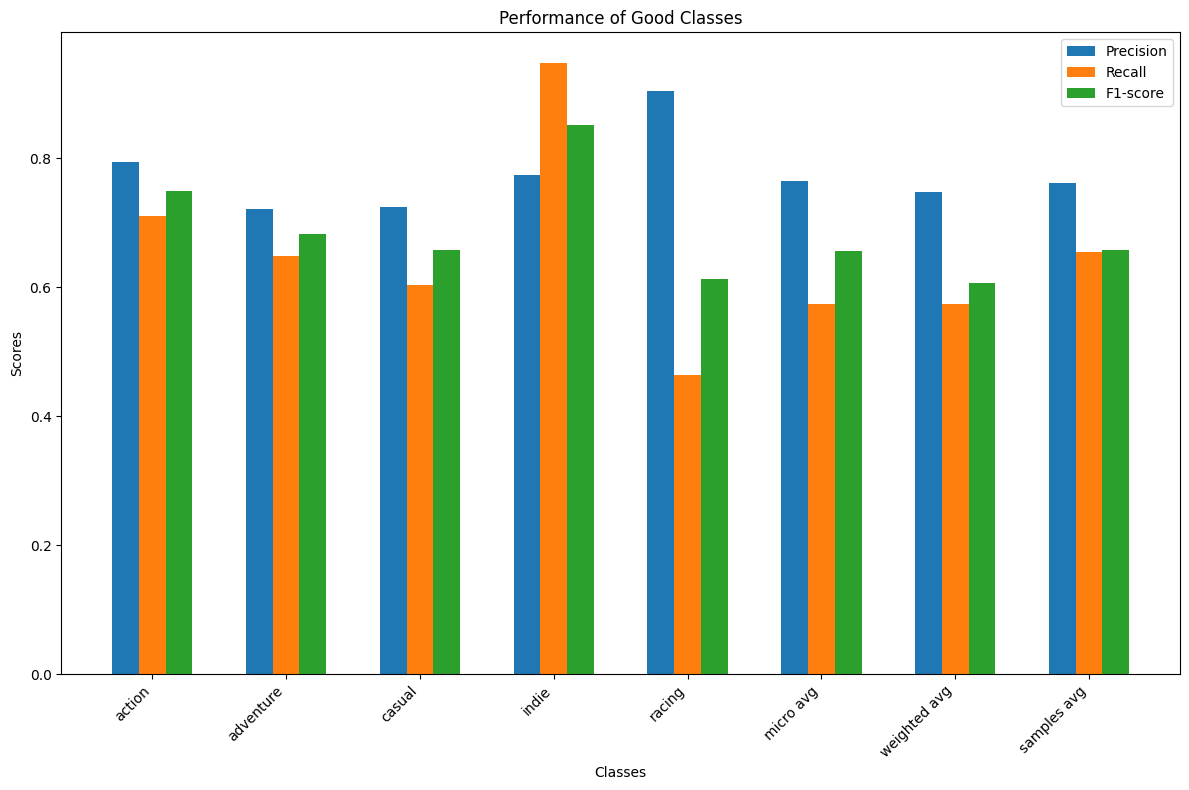

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

def plot_good_performance_classes(y_true, y_pred, mlb, threshold=0.6):
    # Generar el reporte de clasificación
    report = classification_report(y_true, y_pred, target_names=mlb.classes_, output_dict=True)
    
    # Filtrar las clases con buen rendimiento
    good_classes = {cls: metrics for cls, metrics in report.items() if isinstance(metrics, dict) and metrics['f1-score'] >= threshold}
    
    # Extraer los nombres de las clases y las métricas
    classes = list(good_classes.keys())
    precision = [good_classes[cls]['precision'] for cls in classes]
    recall = [good_classes[cls]['recall'] for cls in classes]
    f1_score = [good_classes[cls]['f1-score'] for cls in classes]
    
    # Configurar la gráfica
    x = np.arange(len(classes))
    width = 0.2
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(x - width, precision, width, label='Precision')
    ax.bar(x, recall, width, label='Recall')
    ax.bar(x + width, f1_score, width, label='F1-score')
    
    # Añadir etiquetas y título
    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Performance of Good Classes')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.legend()
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
plot_good_performance_classes(y_test_encoded, y_pred, mlb)